In [2]:
# repitition of abb05, bp on gains and shifts, and then do hebbian learning to transfer learning to weights
# only do hebbian learning and narrowing when loss is below a threshold, continuous bp
# very sensitive to oja's alpha, which determines the convergence of loss, not good for perturbation
# threshold on data point loss for hebbian learning is also important, otherwise can't converge below 0.001

In [3]:
import sys
sys.path.append("../training")
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import pickle
from training_abb05_threshhebb import SimpleNeuralNetwork

In [4]:
# load the pickle file
filedir = "../weights/"
filename = "weights_abb05_threshhebb.pkl"
filepath = filedir + filename
with open(filepath, 'rb') as f:
    model = pickle.load(f)
    losses = pickle.load(f)
    weight_sums = pickle.load(f)
    gain_changes = pickle.load(f)
    shift_changes = pickle.load(f)
    weights = pickle.load(f)
epochs = len(losses)

In [5]:
ndata = 200
xs = torch.linspace(0, 2 * torch.pi, ndata)
ys = torch.cos(xs)/4 + 0.5

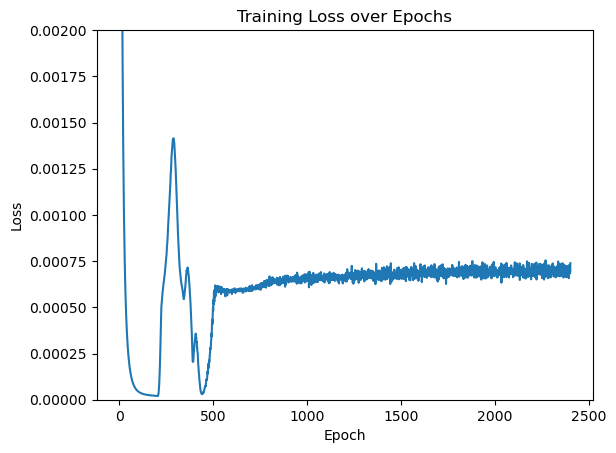

In [6]:
# Plotting the loss
plt.plot(range(epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0,0.002])
plt.title('Training Loss over Epochs')
# plt.savefig('abb05_loss.png')
plt.show()

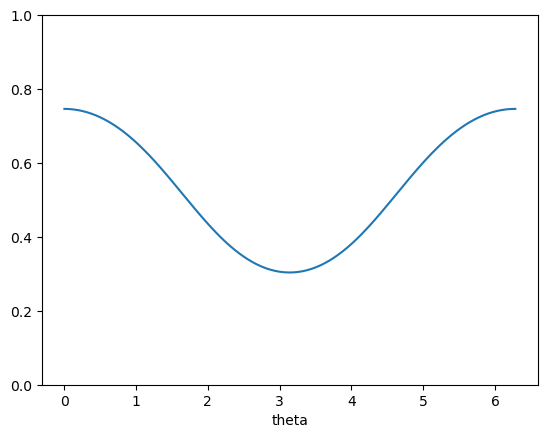

In [7]:
# Plotting the outputs
model.eval()
outputs = []
for x in xs:
    output = model(x)
    outputs.append(output.item())
plt.plot(xs, outputs)
plt.ylim([0,1])
plt.xlabel("theta")
# plt.savefig('abb05_outputs.png')
plt.show()

In [8]:
loss_func = nn.MSELoss()
epoch_losses = 0
for x, y in zip(xs, ys):
    output = model(x)
    epoch_losses += 0.5 * loss_func(output, y)
epoch_losses /= ndata
epoch_losses.item()

/Users/bei/anaconda3/envs/rnn/lib/python3.8/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


0.0006067047361284494

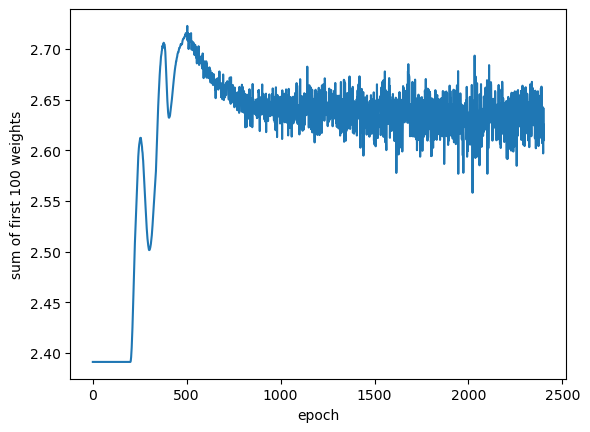

In [9]:
plt.plot(np.arange(epochs), weight_sums)
# plt.ylim([0,8])
plt.xlabel("epoch")
plt.ylabel("sum of first 100 weights")
# plt.savefig('abb05_ws.png')
plt.show()

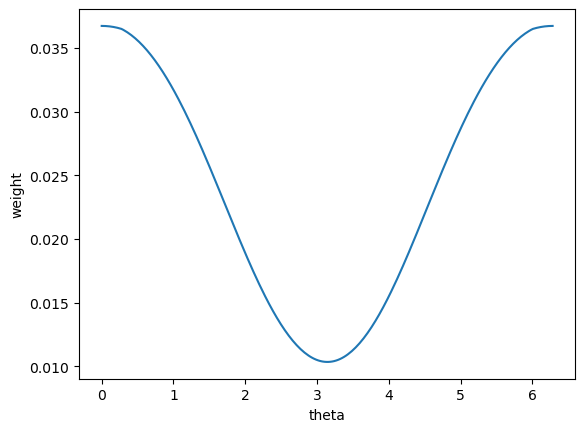

In [10]:
final_weight = weights[-1]
plt.plot(np.linspace(0, 2 * np.pi, model.input_size), final_weight.flatten())
# plt.ylim([0,8])
plt.xlabel("theta")
plt.ylabel("weight")
# plt.savefig('abb05_ws.png')
plt.show()

In [11]:
rates = []
for x in xs:
    input = model.gaussian_rf(x)
    rate = model.activation_func(model.gain * (input - model.shift))
    rates.append(rate)
rates = torch.cat(rates, dim=1)
rates = rates.detach().numpy().round(4)
rates

array([[0.5   , 0.4996, 0.4985, ..., 0.4985, 0.4996, 0.5   ],
       [0.4997, 0.5   , 0.4995, ..., 0.4969, 0.4987, 0.4997],
       [0.4988, 0.4998, 0.4999, ..., 0.4947, 0.4972, 0.4988],
       ...,
       [0.4988, 0.4972, 0.4947, ..., 0.4999, 0.4998, 0.4988],
       [0.4997, 0.4987, 0.4969, ..., 0.4995, 0.5   , 0.4997],
       [0.5   , 0.4996, 0.4985, ..., 0.4985, 0.4996, 0.5   ]],
      dtype=float32)

Text(0, 0.5, 'firing rate')

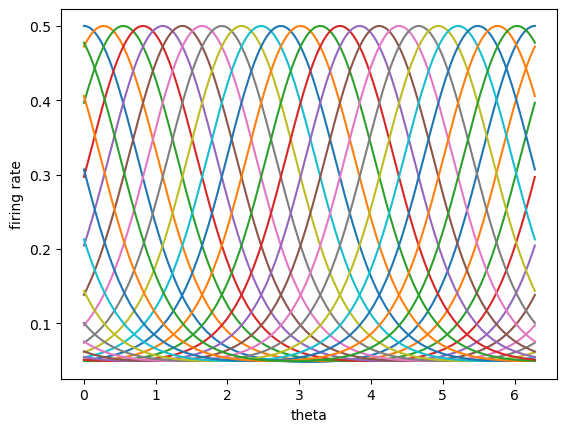

In [12]:
for i in np.arange(0,model.input_size,10):
    thisr = rates[i,:]
    plt.plot(xs, thisr)
plt.xlabel("theta")
plt.ylabel("firing rate")
# plt.savefig('abb05_rf.png')

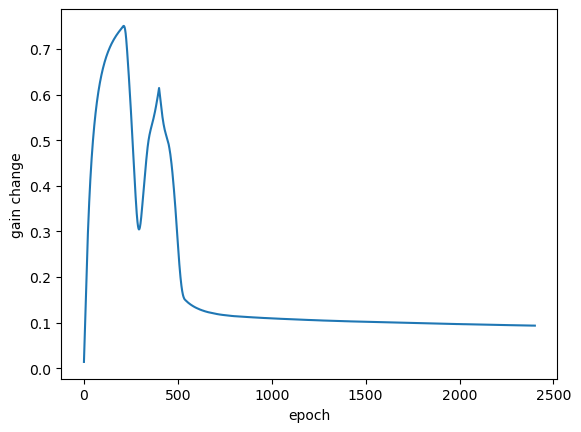

In [13]:
plt.plot(np.arange(epochs), gain_changes)
plt.xlabel("epoch")
plt.ylabel("gain change")
# plt.hlines(y=np.sqrt(460)*0.1, xmin=0, xmax=epochs)
# plt.savefig('abb05_gc.png')
plt.show()

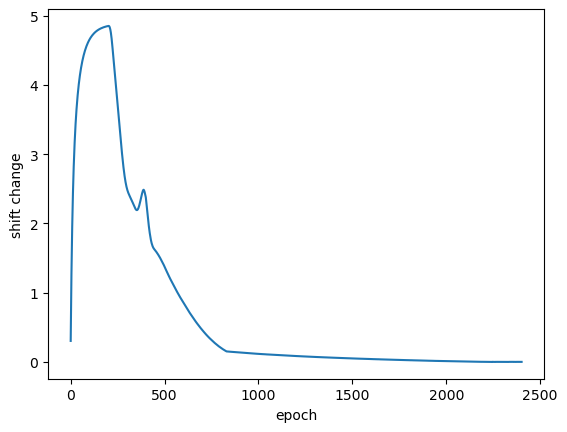

In [14]:
plt.plot(np.arange(epochs), shift_changes)
plt.xlabel("epoch")
plt.ylabel("shift change")
# plt.hlines(y=np.sqrt(460)*0.1, xmin=0, xmax=epochs)
# plt.savefig('abb05_sc.png')
plt.show()

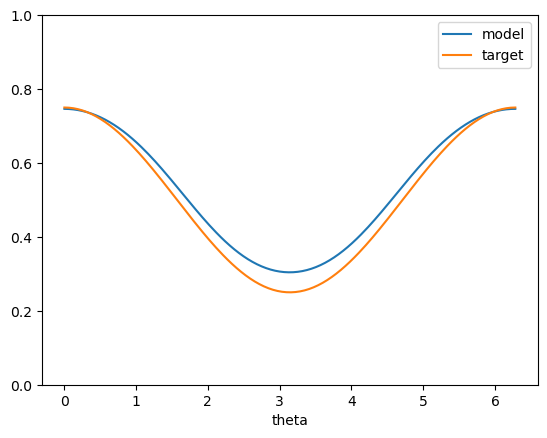

In [15]:
# Plotting the outputs
model.gain = model.init_gain
model.shift = model.init_shift
model.eval()
outputs = []
for x in xs:
    output = model(x)
    outputs.append(output.item())
plt.plot(xs, outputs, label='model')
plt.plot(xs, ys, label='target')
plt.ylim([0,1])
plt.xlabel("theta")
plt.legend()
# plt.savefig('abb05_outputs_nosup.png')